### Name: Sanchit S Agarkar
### Topic : Market segmentation on mcdonalds dataset
### Feynn Task 1


In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.io as pio
import kaleido

In [2]:
#!pip install kaleido

In [3]:
#Creating Data frame
data=pd.read_csv("mcdonalds.csv")

<img src="abc.jpg">

In [4]:
data.head(10)
#First 10 elements in dataframe

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


# Data visualization

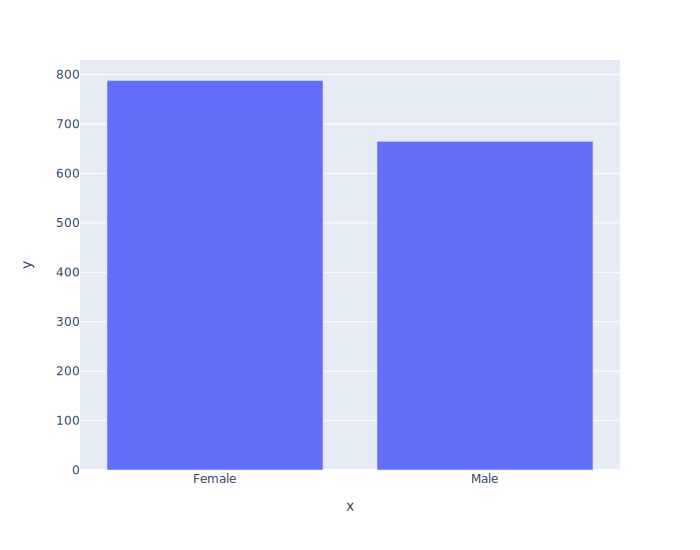

In [7]:

genders = data.Gender.value_counts()
fig=px.bar(data,x=genders.index, y=genders.values, height=550)#,color="healthy")
#fig.show()
fig.show(renderer="svg")

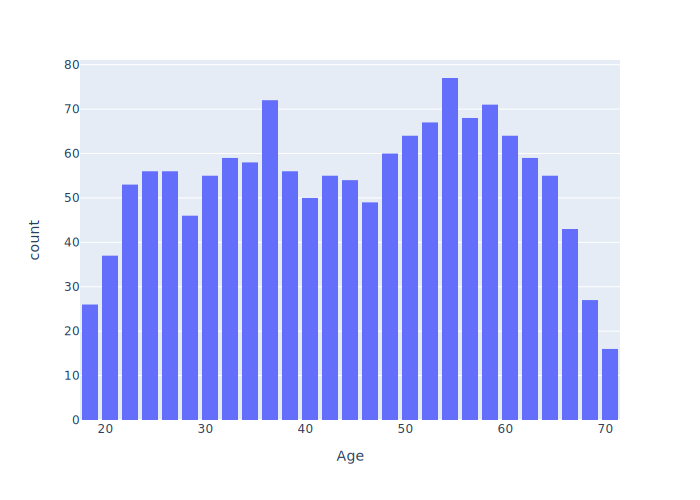

In [8]:
import plotly.express as px

fig = px.histogram(data, x="Age")
fig.update_layout(bargap=0.2)
#fig.show()
fig.show(renderer="svg")

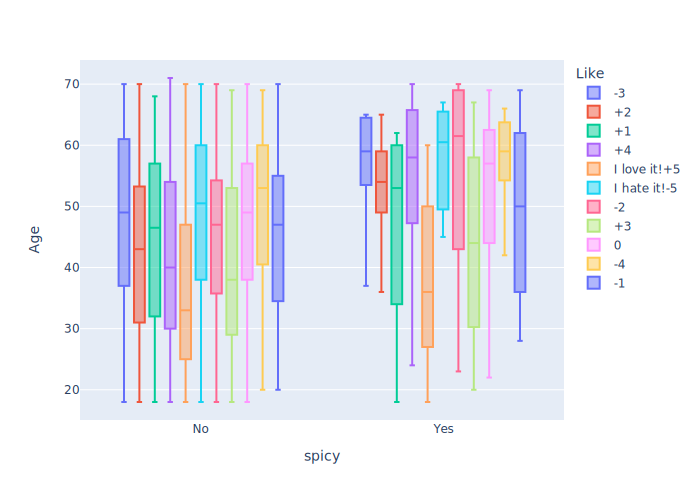

In [9]:
fig = px.box(data, x="spicy", y="Age",color="Like")
#fig.show()
fig.show(renderer="svg")

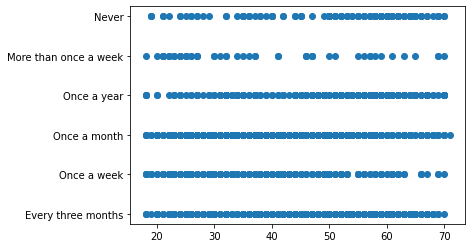

In [10]:
plt.scatter(data['Age'],data['VisitFrequency'])

In [11]:
data = data.replace({'No':0, 'Yes': 1})
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [12]:
X = data.iloc[: , 0:11].values

In [13]:
X.shape

(1453, 11)

In [14]:
print(X)

[[0 1 0 ... 1 0 0]
 [1 1 0 ... 1 0 0]
 [0 1 1 ... 1 1 0]
 ...
 [1 1 0 ... 1 0 0]
 [1 1 0 ... 0 1 0]
 [0 1 0 ... 1 0 1]]


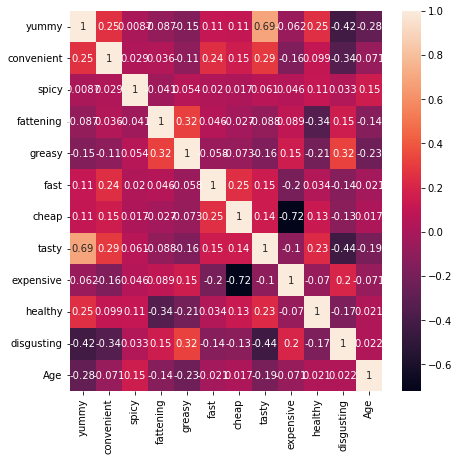

In [15]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [16]:
# 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [17]:
kmeans.cluster_centers_

array([[8.36177474e-01, 9.82935154e-01, 1.22866894e-01, 9.72696246e-01,
        1.00000000e+00, 9.48805461e-01, 8.87372014e-01, 9.52218430e-01,
        1.12627986e-01, 1.91126280e-01, 1.26279863e-01],
       [2.04918033e-02, 6.76229508e-01, 8.19672131e-02, 9.18032787e-01,
        7.09016393e-01, 7.45901639e-01, 6.55737705e-02, 9.42622951e-02,
        8.89344262e-01, 6.14754098e-02, 7.21311475e-01],
       [3.69003690e-03, 8.85608856e-01, 7.01107011e-02, 9.15129151e-01,
        6.16236162e-01, 9.52029520e-01, 9.15129151e-01, 6.27306273e-02,
        1.47601476e-02, 8.11808118e-02, 4.35424354e-01],
       [8.46547315e-01, 9.76982097e-01, 9.20716113e-02, 7.10997442e-01,
        0.00000000e+00, 9.64194373e-01, 8.84910486e-01, 9.66751918e-01,
        3.06905371e-02, 3.75959079e-01, 1.53452685e-02],
       [8.70078740e-01, 9.60629921e-01, 9.84251969e-02, 8.85826772e-01,
        5.19685039e-01, 8.38582677e-01, 3.33066907e-16, 9.40944882e-01,
        1.00000000e+00, 1.92913386e-01, 6.29921260e-

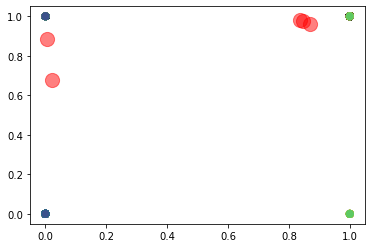

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

In [19]:
kmeans.score(X)

-1434.859644757895

In [20]:
kmeans.inertia_

1434.859644757895

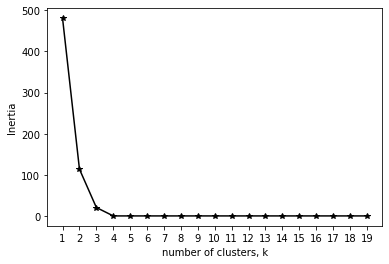

In [21]:
ks = range(1, 20)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X[:,:2])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-*', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

### From the above plot we can see that using elbol method 
### Optimal Number of cluster =3

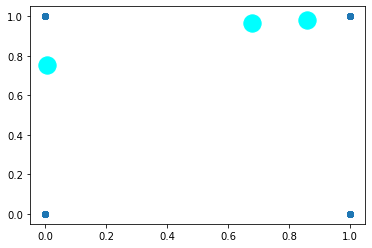

In [22]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='cyan')
plt.show()

In [23]:
#PCA
from sklearn.decomposition import PCA
pca_data = PCA(n_components=5)
principalComponents_data = pca_data.fit_transform(X)

In [24]:
df1 = pd.DataFrame(data = principalComponents_data
             , columns = ['principal component 1', 'principal component 2','principal component 3',
                          'principal component 4','principal component 5' ])

In [25]:
print(df1.head(5))

   principal component 1  principal component 2  principal component 3  \
0               0.425367              -0.219079               0.663255   
1              -0.218638               0.388190              -0.730827   
2               0.375415               0.730435              -0.122040   
3              -0.172926              -0.352752              -0.843795   
4               0.187057              -0.807610               0.028537   

   principal component 4  principal component 5  
0              -0.401300               0.201705  
1              -0.094724               0.044669  
2               0.692262               0.839643  
3               0.206998              -0.681415  
4               0.548332               0.854074  


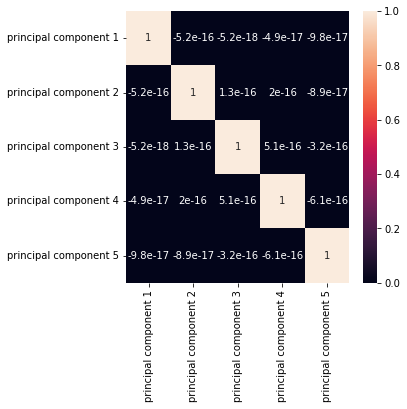

In [26]:
#var  relation of pca
plt.figure(figsize=(5,5))
sns.heatmap(df1.corr(), annot=True)
plt.show()

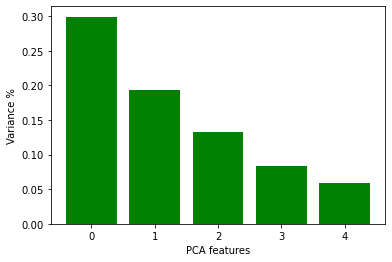

In [27]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='green')



plt.xlabel('PCA features')
plt.ylabel('Variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

### From the above bar graph we can see PC1 which is on zero index has highest variance

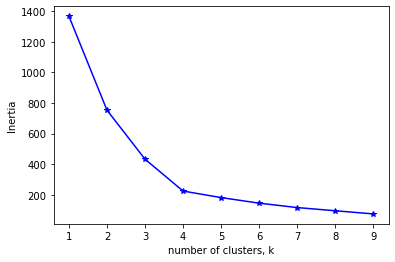

In [28]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:2])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-*', color='blue')
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

### From the above plot we can see that using elbol method 
### Optimal Number of cluster =4

In [29]:
kmeans1 = KMeans(n_clusters=4)
kmeans1

KMeans(n_clusters=4)

In [30]:
y_kmeans1=kmeans1.fit_predict(df1[['principal component 1', 'principal component 2']])
y_kmeans1

print(y_kmeans1.shape)

(1453,)


In [31]:
y_kmeans1

array([0, 1, 1, ..., 1, 3, 2])

In [32]:
df1['Cluster']=y_kmeans1
df1.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,Cluster
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,0
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,1
2,0.375415,0.730435,-0.122040,0.692262,0.839643,1
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,3
4,0.187057,-0.807610,0.028537,0.548332,0.854074,0


Text(0, 0.5, 'principal component 2')

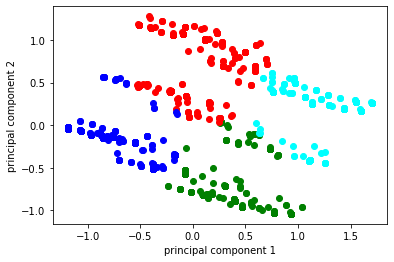

In [33]:
dfc1 =df1[df1.Cluster==0]
dfc2 =df1[df1.Cluster==1]
dfc3 =df1[df1.Cluster==2]
dfc4 =df1[df1.Cluster==3]


plt.scatter(dfc1['principal component 1'],dfc1['principal component 2'],color='green')
plt.scatter(dfc2['principal component 1'],dfc2['principal component 2'],color='red')
plt.scatter(dfc3['principal component 1'],dfc3['principal component 2'],color='cyan')
plt.scatter(dfc4['principal component 1'],dfc4['principal component 2'],color='blue')
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
